FSSC Science Tools
=========================
Data Retrieval, Selection and Exploration
-------------------------

This tutorial is designed to not only make you comfortable running a LAT analysis but also make you familiar with the data and where to go if you want to find more information.  At the end of this tutorial and the likelihood tutorial you should be able to know what all of the various file formats are and be able to perform your own customized simple analysis.  

**Goal:**  *Find information, download data, explore data, make simple views of the data, establish individual projects*

Setting up the Summer School VM
-------------------

In order to follow along with this tutorial, you need to have the VM downloaded, installed and running. 

The software, instructions on getting started, and iPhython notebooks that we'll be following during the school are all on GitHub at:
https://github.com/FermiSummerSchool

If you go to the ssvm project and look at the Readme.md file, you will see the setup instructions:

In [1]:
from IPython.display import Image,HTML

![VM_readme](images/Readme.png)

Any problems with installation of repository, VirtualBox, or Vagrant?
---------

<u>Links:</u>
* Github repository: https://github.com/FermiSummerSchool/ssvm.git
* VirtualBox: https://www.virtualbox.org/wiki/Downloads
* Vagrant: https://www.vagrantup.com/downloads.html


Any problems with the VM setup script?
---------

What does a "which vagrant" return? If "command not found":

Try:

\> hash -r

or

\> rehash


You should copy the content of the USB key we have (hopefully) handed you into the VM shared directory so that you can access it. If you didn't set up a shared directory, you should stop your VM and do that now.

In VirtualBox, select the Summer School VM, then 'Settings', then 'Shared Folders'. Add a shared folder by clicking the plus-folder icon. Provide the full path to the directory wth the contents of the USB key. Name the folder 'shared', and do not check any of the boxes. Click "OK", and then start the VM.

Once you have started the VM, the shared folder is the /vagrant directory...NOT the /home/vagrant directory. The shared folder will be writeable from both the VM and your native operating system.


Accessing these lectures
------------------------

Inside the VM, open Firefox and go to https://confluence.slac.stanford.edu/display/LSP/Fermi+Summer+School+2016 where the lectures are linked. If you click on one of the notebooks it will open in jupyter's notebook viewer. 

If you want copies of the content of the notebooks, you will need to download the contents of Jeremy's GitHub repository. However, more ipython notebooks will be added as the summer school progresses. So you may wish to wait for now. The repository is available at https://github.com/kialio/fermi-summer-school .

If you want to run a notebook locally in the VM, change into the directory where you have saved the notebooks and run them by typing:

> \> jupyter notebook

This will start the jupyter notebook server and open Firefox with links to each notebook in the directory. Click on a notebook and it will open in a new tab.

Now...Where do we start?
---------------------------

Go to the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Analysis](http://fermi.gsfc.nasa.gov/ssc/data/analysis/)&rarr;[System Overview](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/overview.html)


In [2]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/overview.html' width='1000' height='500'></iframe>")

### Multiple levels of documentation

Available from [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Documentation](http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/)

In [3]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/' width='1000' height='500'></iframe>")


* [Installation](http://fermi.gsfc.nasa.gov/ssc/data/analysis/software/) 
    * Details the installation procedure
* [LAT Analysis Start Page](http://http://fermi.gsfc.nasa.gov/ssc/data/analysis/LAT_essentials.html)
    * Summary of the important resources that are needed for standard LAT analysis
* [Analysis Threads](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/) 
    * Examples of actual science analysis where you can follow along step-by-step
* [Cicerone](http://translate.google.com/#it/en/cicerone)
    * General information on the satellite and instruments
    * Describes instrumentation and data acquisition
    * Explains analysis methods
* [Individual Tool Descriptions](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/references.html) 
    * Explains individual tools in detail
    * (Identical to the information available via [*fhelp*](http://heasarc.gsfc.nasa.gov/ftools/users/node7.html)) 

### Downloading and installing the software

Go to the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Analysis](http://fermi.gsfc.nasa.gov/ssc/data/analysis/)&rarr;[Software Download](http://fermi.gsfc.nasa.gov/ssc/data/analysis/software/)

* **Important** things about software installation
    * Pay attention to the supported platforms, if yours isn't supported, it probably isn't supported.
    * Figure out your distribution with *uname -a*

In [4]:
%system uname -a

['Linux dd1385382530 4.9.87-linuxkit-aufs #1 SMP Wed Mar 14 15:12:16 UTC 2018 x86_64 x86_64 x86_64 GNU/Linux']

You can see that I'm running on a 64 bit Linux machine and the kernel version is 2.6.32 (Scientific Linux 6). So I should download the appropriate binary (I could also try to build from source if I wanted). We have already installed the Science Tools in the VM for you, so this is not necessary right now.

* More **important** things:
    * Make sure you read the about any [Known Bugs](http://fermi.gsfc.nasa.gov/ssc/data/analysis/software/KnownBugs_v10r0p5_v0.txt)
    * Make sure your read the [Release Notes](http://fermi.gsfc.nasa.gov/ssc/data/analysis/software/ReleaseNotes_Jun24_2015.txt)

**Note:** This would be a good time to make sure everyone has a working installation of the VM, is running Jupyter Notebook and following along.

### Science Analysis Threads
Go to the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Analysis](http://fermi.gsfc.nasa.gov/ssc/data/analysis/)&rarr;[Analysis Threads](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/)

* What if I'm not at the Summer School?  Where do I start?
    * A good place to start is the data analysis threads.  These are step-by-step guides that reproduce actual science results.  
    * **The best way to learn how to do something is to do it.**
    * Lots of good stuff:

In [5]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/' width='1000' height='500'></iframe>")

### What if I can't figure it out?

Contact us!  **fermihelp@milkyway.gsfc.nasa.gov** . Most of us are nice...most of the time.

### Getting the data
Go to the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[Data Access](http://fermi.gsfc.nasa.gov/ssc/data/access/)

In [6]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/access/' width='1000' height='500'></iframe>")

Lits of data products are available.  What you use depends on what you're doing.  Here are some highlights:

* I want to perform a detailed source anaylsis:
    * LAT Data Server (Pass 7 Reprocessed data)
    
* I want to perform an analysis of a short timescale flare like a GRB or a Solar Flare
    * LAT Low-Energy (LLE) Data
    * Fermi Solar Flare Observations
    * GBM Data
    
* I want to monitor all sources in the full sky 
    * Pass 7 Reprocessed Weekly files
    
* I want to be alerted to flares in known sources
    * LAT Monitored Source List Light Curves
    * Aperture Photometry Light Curves for the LAT 2-year Point Source Catalog
    
* I want to find out about known sources, GRBs, or solar flares.
    * LAT Burst Catalog
    * LAT 4-year Point Source Catalog
    * LAT List of Flaring Sources
    * LAT Pulsar Catalog
    * LAT Hard Sources Catalog
    * GBM Burst Catalog
    * GBM Earth Occultation Sources
    * Fermi Solar Flare Data
    
* I want to know what the spacecraft was doing
    * Spacecraft Data
    * Spacecraft Pointing Files

Don't forget to pay attention to the [caveats](http://fermi.gsfc.nasa.gov/ssc/data/analysis/caveats.html) for the data products you are using.  You never know, it might say don't do what you're trying to do or tell you to do something else!

### Getting our Data
We're going to look at a 20 degree region around the AGN 3C 279 from August 4, 2008 to February 4, 2009 and perform a detailed source anlysis so let's use the LAT data server.

Go to the [FSSC Website](http://fermi.gsfc.nasa.gov/ssc/)&rarr;[Data](http://fermi.gsfc.nasa.gov/ssc/data/)&rarr;[LAT Data Server](http://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi)

In [7]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi' width='1000' height='500'></iframe>")

***How do I fill in these parameters?***

(You can click on the field name for more details.)

* *Object name or coordinates*: you can use the NED/Simbad/GRB Name or the coordinates (like RA,Dec)
    * If you use coordinate lookup, be careful with the coordinates it uses. A name may correspond to several different positions.
* *Search Radius*: This depends on your source region.  I usually do an anlysis on 10 - 15 degrees but I always download 30 degrees of data so I have freedom later to change my mind.  If you want to grab more than this, you probably should think about using the weekly files.
* *Observation dates*:  Lots of options (see the help).  [xtime](http://heasarc.gsfc.nasa.gov/cgi-bin/Tools/xTime/xTime.pl) is very useful.
* *Energy Range*: separated by a comma.
* *LAT data type*: Photon or Extended, more on this later.
* *Spacecraft data*: yes.  You want this.

Here are the selection commands so you can copy/paste

* Coordinates: 194.05, -5.79
* Search Radius: 30
* Time range (MET): 239557417,255398400 (or START, 2009-02-04 00:00:00)
* Energy range (MeV): 100, 500000

I've already downloaded these data.  You can get them in the data directory in the USB drive we've given you.  Here's the resulting page (for the record).

![DataServer1](images/FSSC_DataServer1.png)

If you click on the link to get to the query result you get this:

https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/QueryResults.cgi?id=L170529092347D1C7019386

![DataServer2](images/FSSC_DataServer2.png)

You could click the *Available* links or you could just use the *wget* commands in a terminal window. 
(I added the '-q' for quiet).

In [8]:
%system wget http://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L170529092347D1C7019386_SC00.fits
%system wget http://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L170529092347D1C7019386_PH00.fits

['--2018-05-24 13:20:45--  http://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L170529092347D1C7019386_PH00.fits',
 'Resolving fermi.gsfc.nasa.gov... 129.164.179.26',
 'Connecting to fermi.gsfc.nasa.gov|129.164.179.26|:80... connected.',
 'HTTP request sent, awaiting response... 301 Moved Permanently',
 'Location: https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L170529092347D1C7019386_PH00.fits [following]',
 '--2018-05-24 13:20:45--  https://fermi.gsfc.nasa.gov/FTP/fermi/data/lat/queries/L170529092347D1C7019386_PH00.fits',
 'Connecting to fermi.gsfc.nasa.gov|129.164.179.26|:443... connected.',
 'HTTP request sent, awaiting response... 404 Not Found',
 '2018-05-24 13:20:45 ERROR 404: Not Found.',
 '']

We put these in the data directory of the current working directory, and rename them for ease of use to SC00.fits and PH00.fits.

In [10]:
ls ../data/

PH00.fits  SC00.fits


So, what do we have now?  We've got a photon file (you could get several of these depending on how the query was executed) and one spacecraft file. According to the data server, the photon file contains 569,325 events.

Let's take a look at these with the ftool *fv* and see what we have.

In [11]:
%system fv data/PH00.fits

['No protocol specified',
 'No protocol specified',
 'application-specific initialization failed: couldn\'t connect to display "docker.for.mac.localhost:0"',
 'No protocol specified',
 'No protocol specified',
 'Error in startup script: couldn\'t connect to display "docker.for.mac.localhost:0"',
 '    while executing',
 '"load /home/astrosoft/ftools/x86_64-pc-linux-gnu-libc2.12/lib/libtk8.6.so Tk"',
 '    ("package ifneeded Tk 8.6.6" script)',
 '    invoked from within',
 '"load /home/astrosoft/ftools/x86_64-pc-linux-gnu-libc2.12/lib/itk4.1.0/libitk4.1.0.so Itk"',
 '    ("package ifneeded Itk 4.1.0" script)',
 '    invoked from within',
 '"package require Itk"',
 '    (procedure "fvInit" line 11)',
 '    invoked from within',
 '"fvInit data/PH00.fits"',
 '    ("eval" body line 1)',
 '    invoked from within',
 '"eval fvInit $argv"',
 '    (file "/home/fermi/astrosoft/ftools/x86_64-pc-linux-gnu-libc2.12/lib/fv/fvInit.tcl" line 18)']

Here's what you should see.  Let's poke at the GUI for a bit and talk about what we have.

![Data_FV1](images/FSSC_fv1.png)

This is a [FITS](http://en.wikipedia.org/wiki/FITS) file which is an open standard defining a digital file format useful for storage, transmission and processing of scientific and other images.  It has three Header Data Units (HDUs); the first is (and always must be) an image even if it's empty (as it is in this case).  The second and third are binary types and store data.  All of our data are in the second hdu (index = 1) and you can see that there are 23 columns and 569,420 rows.  This means we have 569,420 events in this single photon file!  The last HDU is a binary table called GTI which details the good time intervals for the data in this file.  If you poke the 'Header' button for the second HDU (the EVENTS table) you get this.

![Data_FV2](images/FSSC_fv2.png)

All sorts of useful information.  

The FTOOLS software package contains a number of commands that can help you view, add, delete and/or modify header information. For Fermi-LAT data files, we do not advise you to make any header changes (except in dire circumstances). Modifying these headers could corrupt the file so that the analysis tools can no longer read it.

Let's close the header and click on the 'All' button for the sedcond HDU (the one with all of our data).  It should look like this:

![Data_FV3](images/FSSC_fv3.png)

There's a row for every event and each column details all of the information about that event.  You could click the header to find more details or check out the [information about the columns](http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_Data/LAT_Data_Columns.html) on the FSSC site.  We can have a look at them.  And you can see what the 'extended' data are all about.

In [12]:
HTML("<iframe src='http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_Data/LAT_Data_Columns.html' width='1000' height='500'></iframe>")

The extended file just has some extra information about each event.  

This page also details what's in the spacecraft file.  You can use 'fv' to plot some of these parameters or we can actually plot them here in python.

In [15]:
from astropy.io import fits as pyfits

In [16]:
sc_hdulist = pyfits.open('../data/SC00.fits')

In [17]:
sc_hdulist.info()

Filename: ../data/SC00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  SC_DATA       1 BinTableHDU    265   445088R x 30C   [D, D, 3E, E, E, D, E, E, E, E, E, E, L, E, E, E, E, E, E, E, J, B, I, D, D, D, D, D, E, E]   


In [18]:
sc_data = sc_hdulist[1].data

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


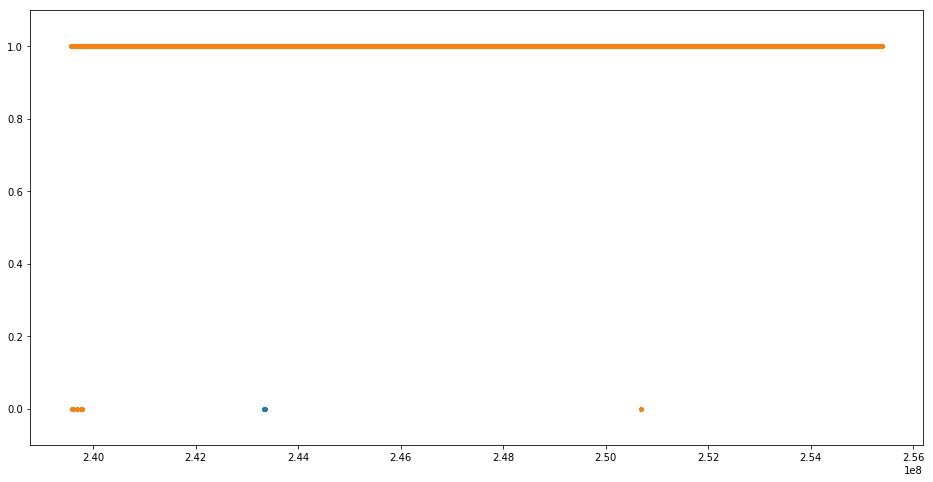

In [21]:
figsize(16,8)
plot(sc_data.field('START'),sc_data.field('DATA_QUAL'),'.')
plot(sc_data.field('START'),sc_data.field('LAT_CONFIG'),'.')
ylim(-0.1,1.1)
show()

[Cool Cool Cool](http://www.youtube.com/watch?v=8IIrf_JSuQk).  You can see that there were some times in there when the LAT data quality was less than perfect.  We'll need to filter these out and figure out which of the events we want to keep.

Filtering and Selecting Data
----------------------------
You can filter and select on any of the parameters of the events but there are some [recommendations and good practices](http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_Data_Exploration/Data_preparation.html) listed at the FSSC site.


![Event_recommendations](images/Event_recommendations.png)

Let's talk about these for a bit:

* The minimum and maximum energy cuts are pretty obvious.  Don't really want to go down below 100 MeV and most of the time could actually raise this to 200 MeV.
* Zenith Angle:  This cut is there to remove events originating from the Earth's limb.
* Event Class: The LAT team makes cuts on the raw data that classifies events based on the probability that they are photons.  Each class has it's own Instrument Response Functions (the description of how the instrument responds to events). With the exception of Solar Flare data, the event classes are nested as shown below.

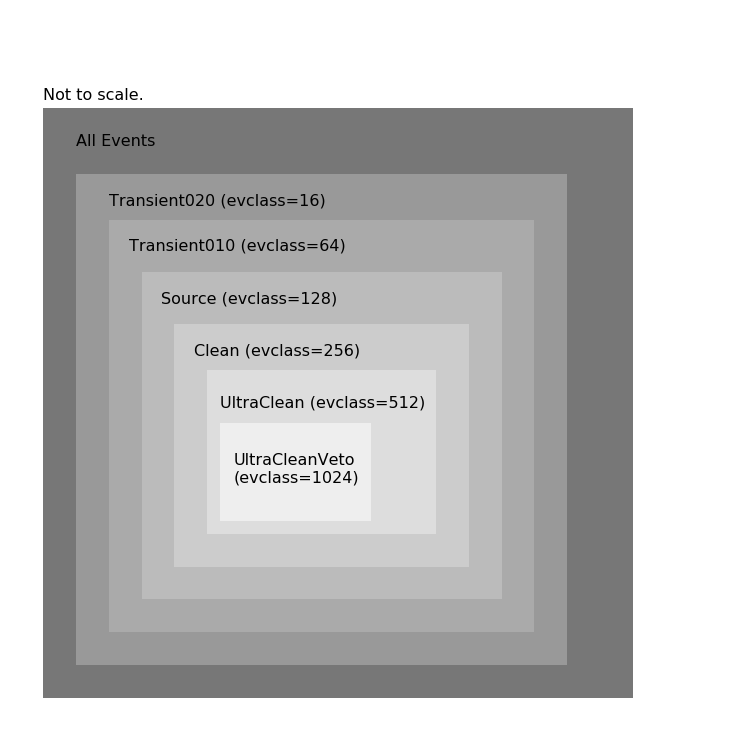

In [22]:
fig = figure(figsize=(10, 10), facecolor='w')
ax = axes((0,0,1,1),xticks=[], yticks=[], frameon=False)
ax.set_xlim(0, 11)
ax.set_ylim(0, 11)

patches = [Rectangle((0.5,0.5),9,9, zorder=1, fc='#777777'),
           Rectangle((1,1),7.5,7.5, zorder=1, fc='#999999'),
           Rectangle((1.5,1.5),6.5,6.3, zorder=1, fc='#AAAAAA'),
           Rectangle((2,2),5.5,5, zorder=1, fc='#BBBBBB'),
           Rectangle((2.5,2.5),4.5,3.7, zorder=1, fc='#CCCCCC'),
           Rectangle((3,3),3.5,2.5, zorder=1, fc='#DDDDDD'),
           Rectangle((3.2,3.2),2.3,1.5, zorder=1, fc='#EEEEEE')]

for p in patches:
    ax.add_patch(p)
    
text(1, 9, "All Events",ha='left', va='center', fontsize=16)
text(1.5, 8.1, "Transient020 (evclass=16)",ha='left', va='center', fontsize=16)
text(1.8, 7.4, "Transient010 (evclass=64)",ha='left', va='center', fontsize=16)
text(2.3, 6.6, "Source (evclass=128)",ha='left', va='center', fontsize=16)
text(2.8, 5.8, "Clean (evclass=256)",ha='left', va='center', fontsize=16)
text(3.2, 5, "UltraClean (evclass=512)",ha='left', va='center', fontsize=16)
text(3.4, 4, "UltraCleanVeto\n(evclass=1024)",ha='left', va='center', fontsize=16)
text(0.5,9.7, "Not to scale.",ha='left', va='center', fontsize=16)
show()

In addition to Event Classes, there are also *Event Types*. There are no recommendations made in the table about which event type to use. This means that filtering on event type is an option available to you, but not necessary for these analyses.

Event Types allow you to futher refine your data set, removing events with less desireable characteristics. There are three event types defined in the PASS 8 LAT data:
* Front/Back - filters based on where the conversion occurred in the instrument
* PSF - Divides the data into four quadriles, based on the quality of the reconstructed direction
* EDISP - Divides the data into four quadriles, based on the quality of the reconstructed energy

![EventType_hierarchy](images/EventType_hierarchy.png)

Both *Event Class* and *Event Type* are bitfields. So to use ALL events for a particular class, you can use an event type value of 3, 60, or 960.

### What makes up an Instument Response Function?

The best place to get a look at this is the [LAT Performance Page](http://www.slac.stanford.edu/exp/glast/groups/canda/lat_Performance.htm) but you have access to the IRFs if you want to play with them. You can find the IRF files in:

/home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/caldb/CALDB/data/glast/lat/bcf

In [23]:
HTML("<iframe src='http://www.slac.stanford.edu/exp/glast/groups/canda/lat_Performance.htm' width='1000' height='500'></iframe>")

In [24]:
from os import environ

In [25]:
caldb = environ['CALDB']
print caldb

/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/caldb/CALDB


In [26]:
ls $caldb

data/  software/


In [27]:
ls $caldb/data/glast/lat/bcf/ea

aeff_P6_v11_diff_back.fits@            aeff_P7TRANSIENT_V6_front.fits@
aeff_P6_v11_diff_front.fits@           aeff_P7ULTRACLEAN_V6_back.fits@
aeff_P6_v1_diff_back.fits@             aeff_P7ULTRACLEAN_V6_front.fits@
aeff_P6_v1_diff_front.fits@            aeff_P8R2_CLEAN_V6_EDISP.fits@
aeff_P6_v1_source_back.fits@           aeff_P8R2_CLEAN_V6_FB.fits@
aeff_P6_v1_source_front.fits@          aeff_P8R2_CLEAN_V6_PSF.fits@
aeff_P6_v1_trans_back.fits@            aeff_P8R2_SOURCE_V6_EDISP.fits@
aeff_P6_v1_trans_front.fits@           aeff_P8R2_SOURCE_V6_FB.fits@
aeff_p6_v3_dataclean_back.fits@        aeff_P8R2_SOURCE_V6_PSF.fits@
aeff_p6_v3_dataclean_front.fits@       aeff_P8R2_TRANSIENT010E_V6_EDISP.fits@
aeff_P6_v3_diff_back.fits@             aeff_P8R2_TRANSIENT010E_V6_FB.fits@
aeff_P6_v3_diff_front.fits@            aeff_P8R2_TRANSIENT010E_V6_PSF.fits@
aeff_P6_v3_source_back.fits@           aeff_P8R2_TRANSIENT010_V6_EDISP.fits@
aeff_P6_v3_source_front.fits@          aeff_P8R2_TRANSIENT010_V6_FB

In [28]:
aeff_P8R2_SOURCE_V6_FB_HDUs = pyfits.open(caldb+'/data/glast/lat/bcf/ea/aeff_P8R2_SOURCE_V6_FB.fits')

In [29]:
print aeff_P8R2_SOURCE_V6_FB_HDUs.info()

Filename: /home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/refdata/fermi/caldb/CALDB/data/glast/lat/bcf/ea/aeff_P8R2_SOURCE_V6_FB.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   ()      
  1  EFFECTIVE AREA_FRONT    1 BinTableHDU     58   1R x 5C   [74E, 74E, 32E, 32E, 2368E]   
  2  PHI_DEPENDENCE_FRONT    1 BinTableHDU     61   1R x 6C   [23E, 23E, 8E, 8E, 184E, 184E]   
  3  EFFICIENCY_PARAMS_FRONT    1 BinTableHDU     36   2R x 1C   [6E]   
  4  EFFECTIVE AREA_BACK    1 BinTableHDU     58   1R x 5C   [74E, 74E, 32E, 32E, 2368E]   
  5  PHI_DEPENDENCE_BACK    1 BinTableHDU     61   1R x 6C   [23E, 23E, 8E, 8E, 184E, 184E]   
  6  EFFICIENCY_PARAMS_BACK    1 BinTableHDU     36   2R x 1C   [6E]   
None


Getting Help for the Science Tools
------------------

The Science Tools consist of a set of 'ballistic' tools that each perform a very specific function. Some of these tools (like the data filtering tool gtselect) will be used in essentially every kind of analysis. Other are very specialized (like the pulsar phase assignment tool *gtpphase*). A complete analysis will string the execution of these tools together in a custom and customizable fashion.

It's important to know how to find information about these tools.

All of the fermi ballistic tools are here:

In [30]:
fermi_dir = environ['FERMI_DIR']
print fermi_dir

/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12


In [31]:
ls $fermi_dir/bin/gt*

/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtbary@
/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtbin@
/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtbindef@
/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtbkg@
/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtburst@
/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtburstfit@
/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtdiffrsp@
/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtdispcube@
/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtephem@
/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtexpcube@
/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtexpcube2@
/home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtexphpsun@
/hom

You can find more information out about a tool by using *fhelp*.

In [32]:
%system fhelp gtselect

['NAME',
 '',
 '    gtselect - Performs selection cuts on event data files.',
 '',
 '',
 'USAGE',
 '    ',
 '    gtselect infile outfile ra dec rad tmin tmax emin emax zmin zmax',
 '             evclass evtype ',
 '',
 '',
 'DESCRIPTION',
 '',
 '    gtselect creates a filtered FITS file by selecting rows from an input',
 '    event data file based on user-specified cuts that are applied to',
 '    each row of the input file. This application enables detailed',
 '    selections to be made on Fermi photon and event data obtained from the ',
 '    FSSC data server or simulated data generated using gtobssim',
 '    (see gtobssim help). The most common selections are these',
 '    involving time range (minimum and maximum time) and energy range',
 '    (minimum and maximum energy), and event class.  For each cut that is applied Data',
 '    Subspace (DSS) keywords are written to the EVENTS header of the',
 '    output FITS file that describe the selection.  This information is',
 '    used 

There is a parameter file associated with each tool that holds the last used values for each parameter needed to run the tool. These files are copied to a working directory when you first run a specific Science Tool. In the VM, the working copy of the parameter files can be found in /home/fermiuser/pfiles.

If you corrupt the parameter file for a specific tool, you can always delete it from your working directory. The Science Tools will generate a new working copy the next time you run that particular tool. 

You can view the parameters associated with each tool and their current values by running the *plist* command. Parameters inside parentheses () are *hidden parameters* and must be called explicity as part of the command when running on the command line. 

You can also reset the parameters to the initial defaults by using the *punlearn* command. The is VERY USEFUL for scripting.

In [33]:
%system plist gtselect

['Parameters for /home/fermi/pfiles/gtselect.par',
 '       infile =                  Input FT1 file',
 '      outfile =                  Output FT1 file',
 '           ra = INDEF            RA for new search center (degrees)',
 '          dec = INDEF            Dec for new search center (degrees)',
 '          rad = INDEF            radius of new search region (degrees)',
 '         tmin = INDEF            start time (MET in s)',
 '         tmax = INDEF            end time (MET in s)',
 '         emin = 30               lower energy limit (MeV)',
 '         emax = 300000           upper energy limit (MeV)',
 '        (zmin = 0)               minimum zenith angle value (degrees)',
 '         zmax = 180              maximum zenith angle value (degrees)',
 '     (evclass = INDEF)           Event class selection',
 '    (evclsmin = 0)               Minimum event class ID',
 '    (evclsmax = 10)              Maximum event class ID',
 '      (evtype = INDEF)           Event type selections'

Filtering the Data
------------------

So, for the point source analysis we're doing, we'll use source class events, and we won't filter on event type.  We use *[gtselect](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtselect.txt)* to do the selection.  There are ways to do this from within python (you'll see these in a moment) but we'll run this from a terminal right now. 

Since we were given two separate photon files from the data server we need to make a file list so that when we run *gtselect* it knows to look in both files for events that match our selections.  Here's a quick way to do this:

In [35]:
%system ls ../data/

['PH00.fits', 'SC00.fits']

In [47]:
%system ls ../data/*PH* > ../data/events.txt

[]

In [48]:
%system cat ../data/events.txt

['../data/PH00.fits']

Now we're ready to go.  Note in the usage for *gtselect* that the event class isn't listed.  It's a 'hidden parameter', so you'll need to run the tool like this:

> \> gtselect evclass=128

There's lots of info we need to give gtselect so it makes sense to run *gtvcut* on one of our photon files to figure out what we were doing.


In [49]:
%system gtvcut ../data/PH00.fits EVENTS

['DSTYP1: TIME',
 'DSUNI1: s',
 'DSVAL1: TABLE',
 'DSREF1: :GTI',
 '',
 'GTIs: (suppressed)',
 '',
 'DSTYP2: BIT_MASK(EVENT_CLASS,128,P8R2)',
 'DSUNI2: DIMENSIONLESS',
 'DSVAL2: 1:1',
 '',
 'DSTYP3: POS(RA,DEC)',
 'DSUNI3: deg',
 'DSVAL3: CIRCLE(194.047,-5.78931,30)',
 '',
 'DSTYP4: TIME',
 'DSUNI4: s',
 'DSVAL4: 239557417:255398400',
 '',
 'DSTYP5: ENERGY',
 'DSUNI5: MeV',
 'DSVAL5: 100:300000',
 '']

We can then filter the data, using the recommentations in the table above as a guide:

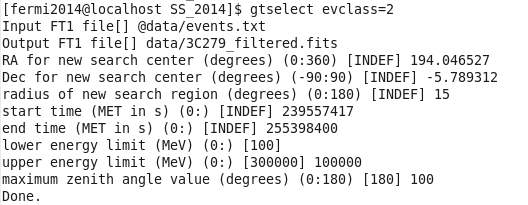

In [50]:
Image(filename='images/gtselect.png')

Some things to note here:

* For the ballistic tool, we had to explicitly give the event class on the command line (it's a *hidden* parameter).
    * You can change this by manually editing your local version of the *parameter file* for this tool, if you wish.
    * This is not an issue for running in python.
* We put an '@' sign in front of the input filename which tells gtselect that this isn't actually a FITS file but a list of FITS files.
* We used the recommended zenith angle cut of 90.
* We could have used INDEF for the start and end times, rather than explicitly stating them. 
* We reduced the radius from 30 degrees (from the data server) to 15 degrees. This means we had to also provide the RA and DEC values (rather than using INDEF). The science tools use a position keyword that includes all three values. If you declare one, you have to declare them all.
* We used a slightly different position from the one used in the data server.  This is fine if you are reducing the radius. However, if you don't reduce the radius, you should use INDEF for all the parameters (RA, DEC, Radius) to avoid offsetting your circle and ending up with a sliver of sky without data.


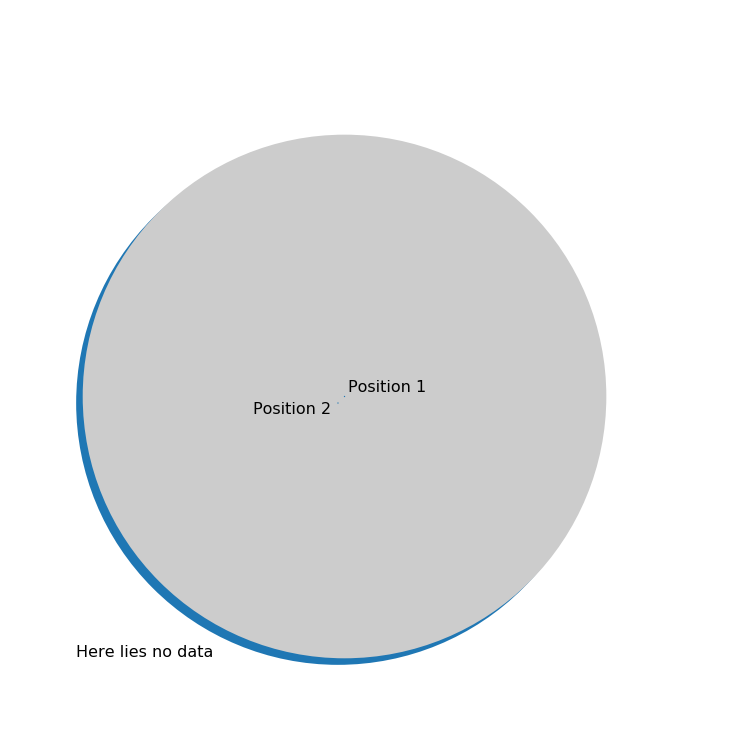

In [51]:
box_bg = '#CCCCCC'
fig = figure(figsize=(10, 10), facecolor='w')
ax = axes((0,0,1,1),xticks=[], yticks=[], frameon=False)
ax.set_xlim(0, 11)
ax.set_ylim(0, 11)

patches = [Circle((5,5),4, zorder=1),
           Circle((5.1,5.1),4, zorder=1, fc='#CCCCCC'),
           Circle((5,5),0.01),
           Circle((5.1,5.1),0.01)]
        

for p in patches:
    ax.add_patch(p)
    
text(5.15, 5.25, "Position 1",ha='left', va='center', fontsize=16)
text(4.9, 4.9, "Position 2",ha='right', va='center', fontsize=16)
text(1, 1.2, "Here lies no data",ha='left', va='center', fontsize=16)
show()

You can run all the analysis tools on the command line, as above. However, in python, it's (obviously) easier to run using a python version of the science tools. I'm going to run this using the python toolset called *[gtapps](http://fermi.gsfc.nasa.gov/ssc/data/analysis/user/gtapps_mp_README.txt)*.

In python, this same call to getselect would look like this:

In [52]:
import gt_apps
from gt_apps import filter
filter.pars()

' infile=@../data/events.txt outfile=../data/3C279_filtered.fits ra=194.0 dec=-5.8 rad=15.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evclsmin=0 evclsmax=10 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [53]:
filter['infile'] = '@../data/events.txt'
filter['outfile'] = '../data/3C279_filtered.fits'
filter['ra'] = 194.0
filter['dec'] = -5.8
filter['rad'] = 15
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 100
filter['emax'] = 300000
filter['zmax'] = 90
filter['evclass'] = 128
filter['evtype'] = 3

You can check what the command will look like before you run it. This is also useful for logging, and when building scripts.

In [54]:
filter.command()

'time -p /home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtselect infile=@../data/events.txt outfile=../data/3C279_filtered.fits ra=194.0 dec=-5.8 rad=15.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evclsmin=0 evclsmax=10 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [55]:
filter.run()

time -p /home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtselect infile=@../data/events.txt outfile=../data/3C279_filtered.fits ra=194.0 dec=-5.8 rad=15.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evclsmin=0 evclsmax=10 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 3.43
user 0.54
sys 1.24


If you tried to compute an exposure map later on you'd get a nasty error and I'd get a help desk message from you.

The Filtered Data
-----------------

Let's take a look at what we have.

In [56]:
filtered_data = pyfits.open('../data/3C279_filtered.fits')

In [57]:
filtered_data.info()

Filename: ../data/3C279_filtered.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    220   56960R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   1537R x 2C   [D, D]   


Notice in the dimensions that we now have 101,844 events in the combined event file.  This is quite a reduction from the 569k events returned by the query.  Lots of events have been filtered out.  

The next thing to do is to make sure we update the good time interval (the GTI) column using the recommended GTI filters.  These can also be found on the [recommendations and good practices](http://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_Data_Exploration/Data_preparation.html).  Here's the relevant table:

![Maketime_recommendations](images/Maketime_recommendations.png)

> ** NOTE: For analyses where an ROI-based zenith cut is NOT performed, an exposure correction must be made using the "zmax" option in the <a href="/ssc/data/analysis/scitools/help/gtltcube.txt">gtltcube</a> tool.**
                
So, the relevant column here is the last one; these filters are just filtering on columns in the spacecraft file we looked at before.  We do this via the *[gtmktime](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtmktime.txt)* command, which is called **maketime** in *gtapps*:  

In [58]:
from gt_apps import maketime
maketime['evfile'] = '../data/3C279_filtered.fits'
maketime['outfile'] = '../data/3C279_mktime.fits'
maketime['scfile'] = '../data/SC00.fits'
maketime['filter'] = 'DATA_QUAL>0 && LAT_CONFIG==1'
maketime['apply_filter'] = 'yes'
maketime['roicut'] = 'no'
maketime.run()

time -p /home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtmktime scfile=../data/SC00.fits sctable="SC_DATA" filter="DATA_QUAL>0 && LAT_CONFIG==1" roicut=no evfile=../data/3C279_filtered.fits evtable="EVENTS" outfile="../data/3C279_mktime.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 1.70
user 0.57
sys 0.29


Some things to note here:

* We gave it the spacecraft file as input (this makes sense).
* We said 'no' to the ROI-based zenith angle cut, as that was the recommendation in the table. This means we will need to apply a zmax cut in *gtltcube* instead.
* Had we said 'yes' to the ROI-based zenith cut, maketime would have made this cut: "angsep(RA_ZENITH,DEC_ZENITH,RA_ROI,DEC_ROI) < ZMAX - ROI_RADIUS". This just cuts out periods when your ROI is close to the zenith and away from the Earth's limb.

Now what do we have...

In [59]:
filtered_data.info()

Filename: ../data/3C279_filtered.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    220   56960R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   1537R x 2C   [D, D]   


In [61]:
mktime_data = pyfits.open('../data/3C279_mktime.fits')
mktime_data.info()

Filename: ../data/3C279_mktime.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    223   56960R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   1537R x 2C   [D, D]   


You can see that the maketime command did not actually remove any events. This means that the bad times we saw early on in the spacecraft file were not associated with periods when the LAT was taking data.   

### Things to think about when making data selections

* What scientific question am I trying to answer?
    * Am I looking at a point source?
    * What spectral shape do I expect (hard spectral shapes could benefit from a higher low-energy cut).
    * Is this a short timescale event (~200 s, like a GRB)?
    * Am I interested in a small region or the whole sky?
    * Is the region close to the galactic plane (here lies analysis dragons, might want to raise the energy threshold, make your ROI smaller)

**Always double check the recommended cuts, especially after a data/software release.**  Don't hesitate to ask the FSSC for advice.  We are working scientists and have proably run into the types of problems you are seeing. And if we can't, we can always contact the software developers.

Quick Looks at the Data
==========================
These are quick ways you can have a look at the data you have. These give you some insight, but they are not statistically rigorous (rigor needs the Likelihood method).  The data you are about to see have not been corrected for things like livetime, exposure, background, random acts of statistics etc.  but go for it…

### Using gtbin to make a counts map

*[gtbin](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtbin.txt)* is a pretty versitle tool: It can make:
* counts maps (counts_map + CMAP)
* healpix maps (counts_map + HEALPIX)
* counts cubes (counts_map + CCUBE)
* simple light curves (evtbin + LC)
* simple spectra (evtbin + PHA1/PHA2)

We're going to make a counts map and plot it with python.  You can also use [ds9](http://hea-www.harvard.edu/RD/ds9/site/Home.html) or fv to plot this.

In [62]:
from gt_apps import counts_map
counts_map['evfile'] = '../data/3C279_mktime.fits'
counts_map['scfile'] = 'NONE'
counts_map['outfile'] = '../data/3C279_cmap.fits'
counts_map['algorithm'] = 'CMAP'
counts_map['xref'] = 194.0
counts_map['yref'] = -5.8
counts_map['coordsys'] = 'CEL'
counts_map['nxpix'] = 400
counts_map['nypix'] = 400
counts_map['binsz'] = 0.1
counts_map['axisrot'] = 0.0
counts_map['proj'] = 'AIT'
counts_map.run()

time -p /home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtbin evfile=../data/3C279_mktime.fits scfile=NONE outfile=../data/3C279_cmap.fits algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=400 nypix=400 binsz=0.1 coordsys="CEL" xref=194.0 yref=-5.8 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version ScienceTools-v11r5p3-fssc-20170716
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.93
user 0.22
sys 0.19


In [63]:
cmap = pyfits.open('../data/3C279_cmap.fits')

In [64]:
cmap.info()

Filename: ../data/3C279_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     126   (400, 400)   int32   
  1  GTI           1 BinTableHDU     48   1537R x 2C   [D, D]   


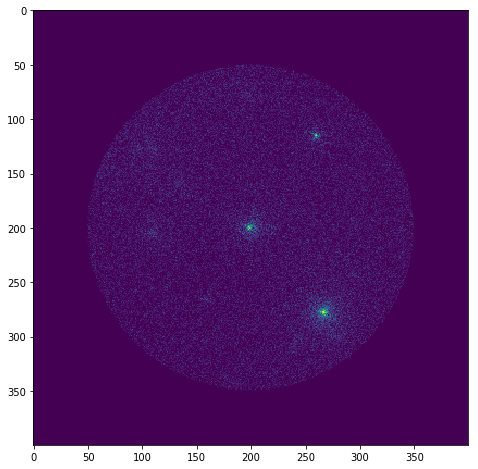

In [65]:
imshow(cmap[0].data)

Note that I'm not using any packages to figure out the World Coordinate System (WCS) of this image so the X and Y are just pixel coordinates.  I could use ds9, fv or aplpy to get proper RA/DEC on this.  But you can immediately see the ROI cut we made, 3C 279 at the center and the other two to five background sources in the field of view.  It'll take a likelihood analysis to wrangle out all of the relevant details about these sources…that's for tomorrow.

## Using gtselect to make a light curve.

We can use gtselect to make a really tight selection around 3C 279. And since it's so bright we can assume that what we're looking at is almost entirely due to the photons from the AGN.  

In [66]:
from gt_apps import filter

In [67]:
filter['infile'] = '../data/3C279_mktime.fits'
filter['outfile'] = '../data/3C279_1deg.fits'
filter['ra'] = 194.047
filter['dec'] = -5.78931
filter['rad'] = 1.0
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 100
filter['emax'] = 300000
filter['zmax'] = 90
filter['evclass'] = 128
filter['evtype'] = 3

In [68]:
filter.command()

'time -p /home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtselect infile=../data/3C279_mktime.fits outfile=../data/3C279_1deg.fits ra=194.047 dec=-5.78931 rad=1.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evclsmin=0 evclsmax=10 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [69]:
filter.run()

time -p /home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtselect infile=../data/3C279_mktime.fits outfile=../data/3C279_1deg.fits ra=194.047 dec=-5.78931 rad=1.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evclsmin=0 evclsmax=10 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.78
user 0.17
sys 0.18


In [71]:
lc_gtselect = pyfits.open('../data/3C279_1deg.fits')

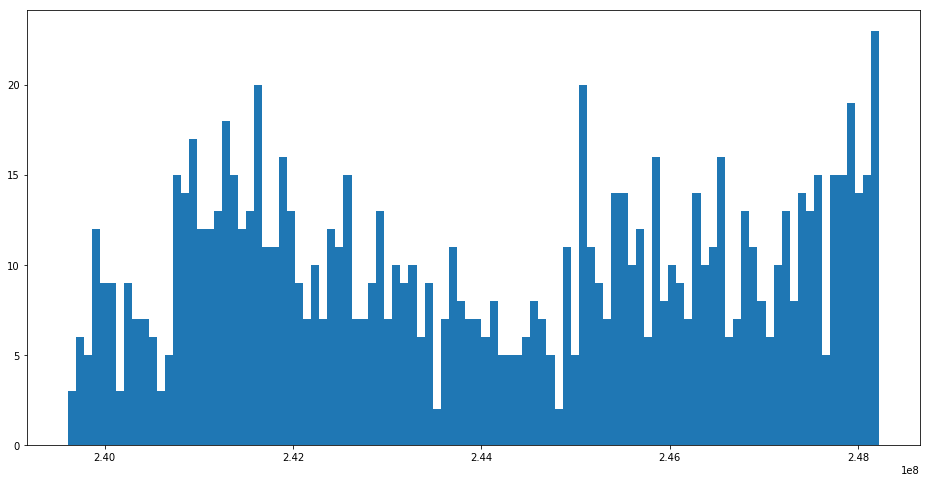

In [72]:
n, bins, patches = hist(lc_gtselect[1].data.field('TIME'), bins=100)

### Using gtbin to make a light curve

It looks a bit weird using a histogram to make a light curve.  We can use *gtbin* to make a more 'sciency' light curve with errors and everything.  We should probably first run gtmktime to update the GTIs of the file we just made.

In [73]:
from gt_apps import maketime, evtbin

In [74]:
maketime['scfile'] = '../data/SC00.fits'
maketime['filter'] = "(DATA_QUAL==1)&&(LAT_CONFIG==1)"
maketime['roicut'] = 'yes'
maketime['evfile'] = '../data/3C279_1deg.fits'
maketime['outfile'] = '../data/3C279_1deg_gti.fits'

In [75]:
maketime.run()

time -p /home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtmktime scfile=../data/SC00.fits sctable="SC_DATA" filter="(DATA_QUAL==1)&&(LAT_CONFIG==1)" roicut=yes evfile=../data/3C279_1deg.fits evtable="EVENTS" outfile="../data/3C279_1deg_gti.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 0.92
user 0.48
sys 0.11


In [76]:
print evtbin.pars()

 evfile= scfile=NONE outfile= algorithm="PHA2" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE coordsys="CEL" axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"


In [77]:
evtbin['algorithm'] = 'LC'
evtbin['outfile'] = '../data/3C279_1deg_lc.fits'
evtbin['evfile'] = '../data/3C279_1deg_gti.fits'
evtbin['scfile'] = '../data/SC00.fits'
evtbin['tbinalg'] = 'LIN'
evtbin['tstart'] = 239557417
evtbin['tstop'] = 255398400
evtbin['dtime'] = 86400

In [78]:
evtbin.run()

time -p /home/fermi/astrosoft/sciencetools/x86_64-unknown-linux-gnu-libc2.12/bin/gtbin evfile=../data/3C279_1deg_gti.fits scfile=../data/SC00.fits outfile=../data/3C279_1deg_lc.fits algorithm="LC" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tstart=239557417.0 tstop=255398400.0 dtime=86400.0 tbinfile=NONE coordsys="CEL" axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version ScienceTools-v11r5p3-fssc-20170716
real 0.83
user 0.46
sys 0.08


In [79]:
lc_gtbin = pyfits.open('../data/3C279_1deg_lc.fits')

<ErrorbarContainer object of 3 artists>

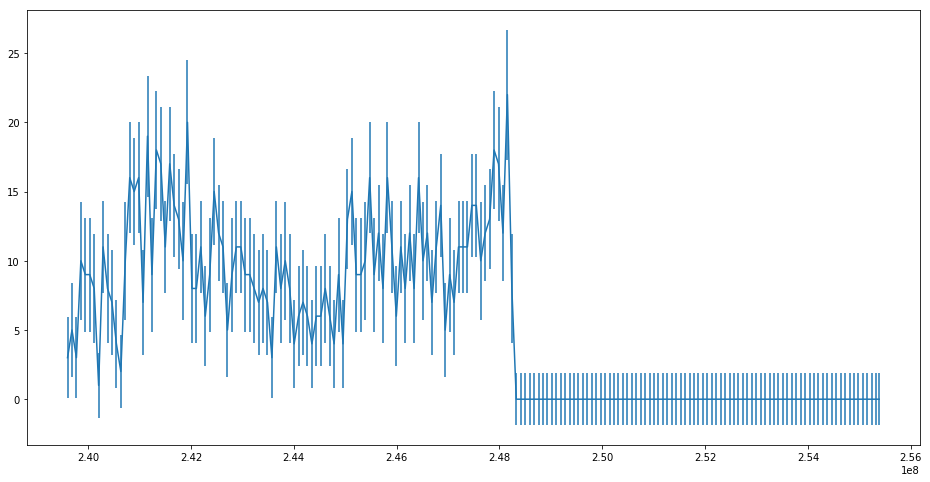

In [80]:
errorbar(lc_gtbin[1].data.field('TIME'),lc_gtbin[1].data.field('Counts'),yerr=lc_gtbin[1].data.field('Error'))

### Other views of the data
Of course, we can't go over all of the ways you can quickly look at the data here are some others (and links to examples):

* [Aperture photometry](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/aperture_photometry.html)
    * R. Corbet of the FSSC also generates [Light curves for all of the 3FGL sources](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/ap_lcs.php).
* Exposure corrected light curves.
* Looking for clusters of photons.
* And lots more...


Projects!
============


Our goal is to help you complete an analysis on a topic of your choice during the next two weeks. We're happy to work on both simple and complex projects, but we are unlikely to have enough time/computational power to complete the complex ones.

Simple project examples:
* Single source spectral and variability analysis for point sources, extended sources, etc.
* Time-dependent characteristics of gamma-ray binaries
* GRB spectra and light curves
* Temporal and spectral characteristics of stellar novae
* Pulsar spectral analysis, weighting, and pulsation searching (using a known pulsar with current timing information)

Complex project examples:
* Characterization of a large-scale/all-sky signal: anisotropy in the EBL, dark matter signals in the GC, Galactic diffuse emission
* Stacking analyses: searching for AGN halos, dark matter search from dwarf spheroidal galaxies
* Searching for new pulsars in the gamma rays
* Characterizing the positron/electron ratio detected by the LAT

## What would you like to try to accomplish?